Base de données Diabetes
La base de données "Diabetes" est disponible sur Kaggle. Cette base de données contient des informations sur des patientes féminines âgées d'au moins 21 ans et provenant de populations amérindiennes Pima, qui ont été examinées pour déterminer s'ils avaient un diabète de type 2. Les caractéristiques incluent des mesures telles que la taille, le poids, l'âge, le nombre de grossesses, la pression artérielle, etc.

Contenu de la base de données
La base de données contient les colonnes suivantes :

Pregnancies : nombre de grossesses
Glucose : concentration de glucose dans le plasma sanguin à jeun
BloodPressure : pression artérielle diastolique (mm Hg)
SkinThickness : épaisseur du pli cutané tricipital (mm)
Insulin : taux d'insuline sérique de 2 heures (mu U/ml)
BMI : indice de masse corporelle (kg/m²)
DiabetesPedigreeFunction : fonction pedigree du diabète
Age : âge (années)
Outcome : variable cible indiquant si le patient est diabétique (0 = non diabétique, 1 = diabétique)
Objectif de l'analyse
# L'objectif de cette analyse est de construire un modèle de classification pour prédire si une patiente a un diabète de type 2 en fonction de ses caractéristiques cliniques. Cette base de données sera divisée en ensembles d'apprentissage et de test pour entraîner et évaluer les performances du modèle.

1-IMPORTATION DES LIBRAIRIES

In [51]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split,GridSearchCV,cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report,recall_score,precision_score,ConfusionMatrixDisplay
from imblearn.over_sampling import SMOTE
from sklearn.metrics import roc_auc_score
from sklearn.ensemble import RandomForestClassifier

2-IMPORTATION DE NOTRE BASE DE DONNEE

In [3]:
data=pd.read_csv('/content/drive/MyDrive/ML/diabetes.csv')
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


3-ANALYSE EXPLORATOIRE DES DONNEES

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


notre base de donnee comporte 768 ligne
9 colonnes dont 7 sont de types entier et 2 de type float

In [5]:
data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


C'est resultat statisque nous relevent des informations importantes:
-l'ecart-type est eloigner de la moyenne pour la plus part des variables
-les  variables SkinThickness et insulin ont 25% de leur donnee nul
-il n'y a pas de valeurs manquantes pour les variables numeriques
-il ya un grand ecart entre la moyenne et la median

In [6]:
#verification si il existe des valeurs manquantes sur les autres variables
data.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

notre jeu de donne ne contient pas de valeur manquntes

In [7]:
#verifions si il n'ya pas de duplication
data.duplicated().sum()

0

nous avons pas de duplications

3-1 ANALYSE UNIVARIE

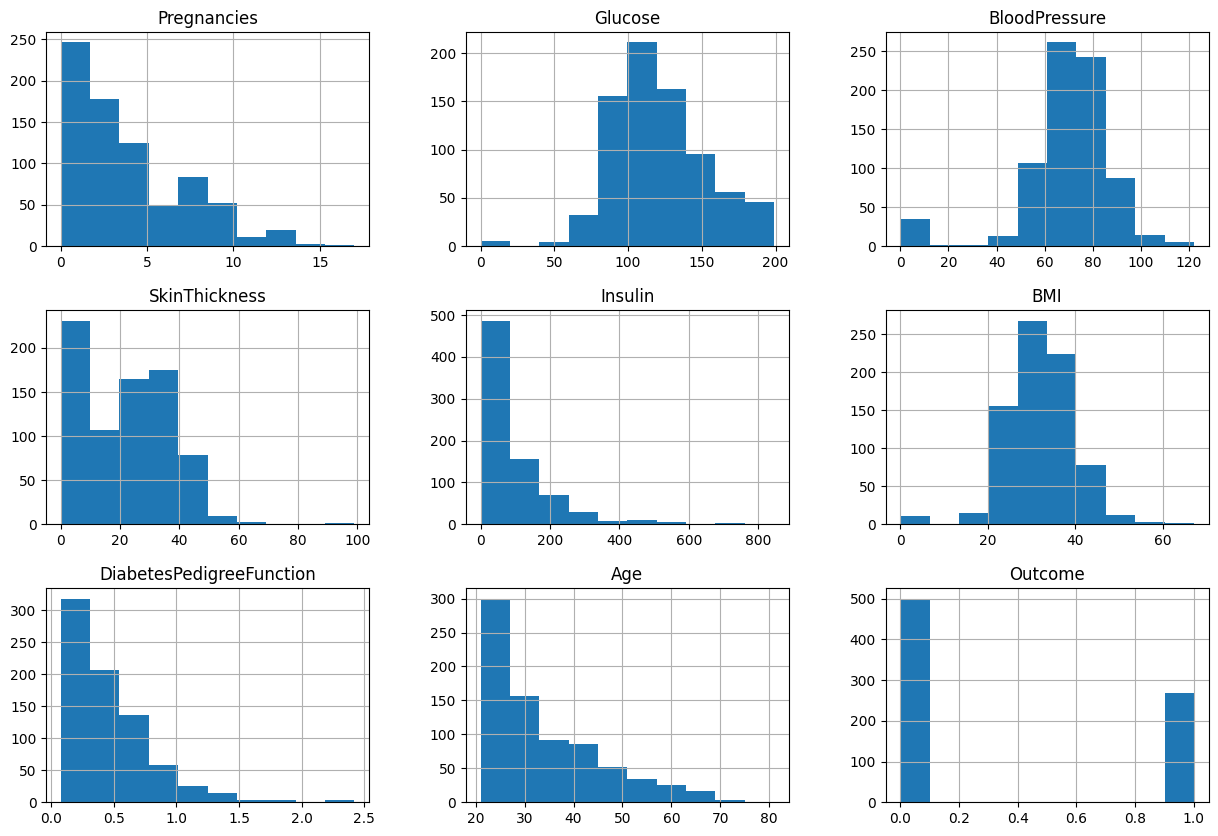

In [8]:
#nous allons faire un histograme pour chaque variables numeriques afin de connaitre le distribution de nos donnee
data.hist(figsize=(15,10))
plt.show()

nous constatons que seul les variables Glucose ,BMI et BLOODPRESURE suivent une loi normale tandis que les autres non

4-2 analyse bivarie

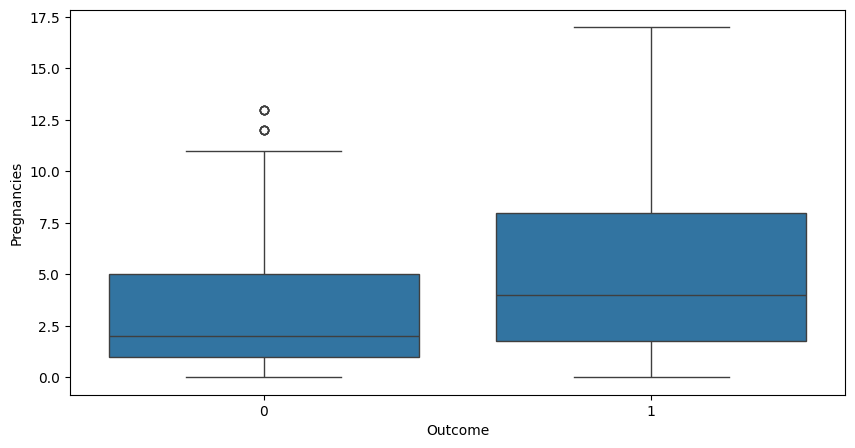

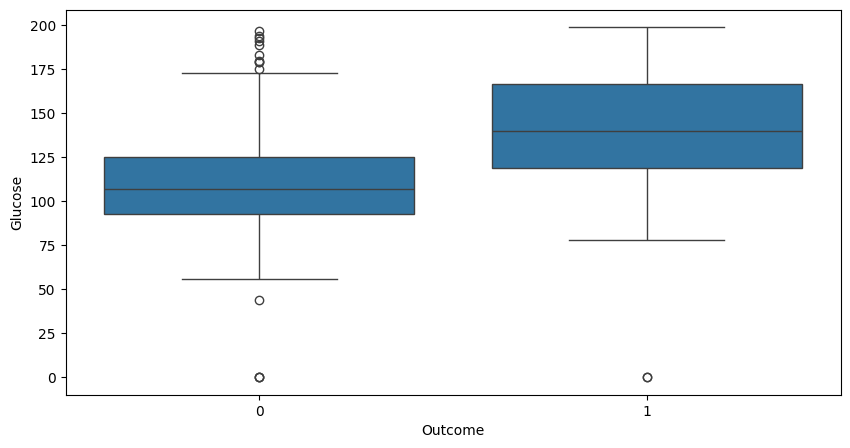

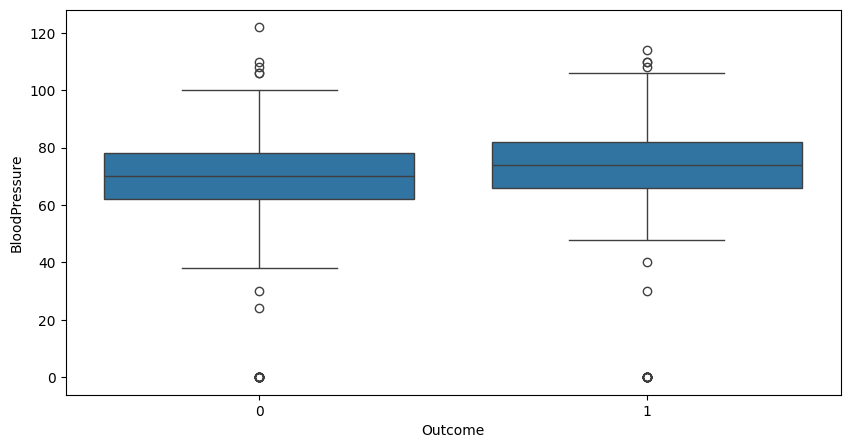

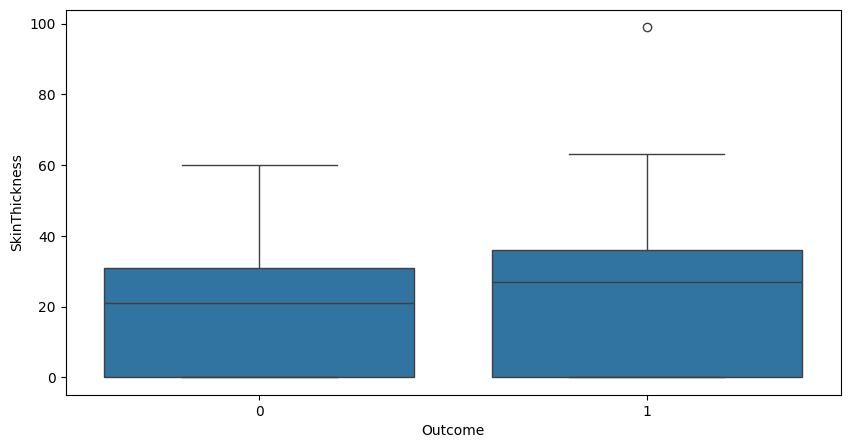

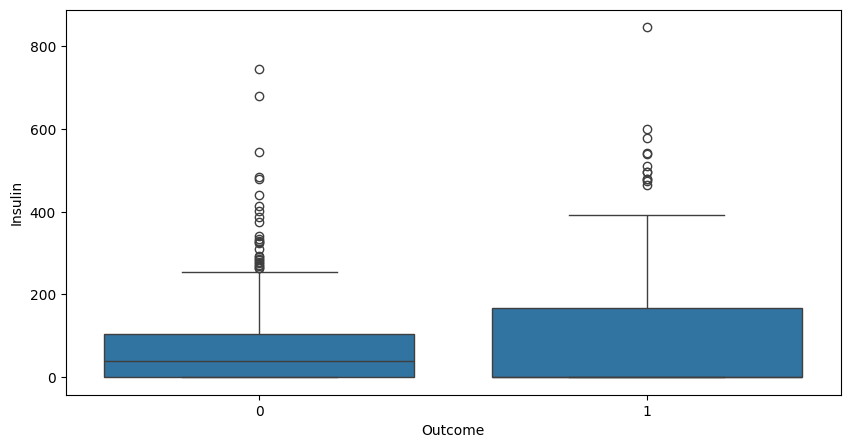

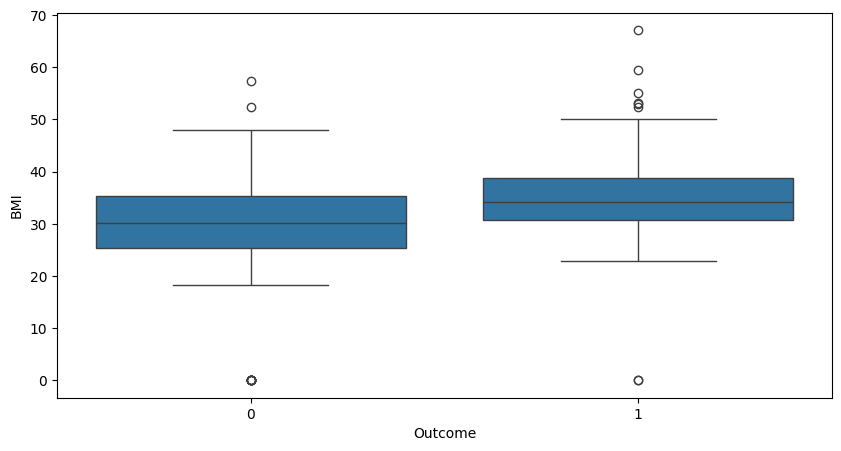

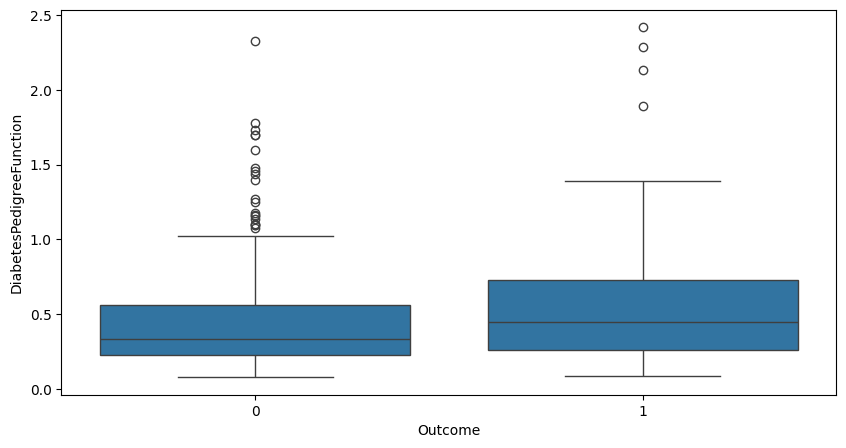

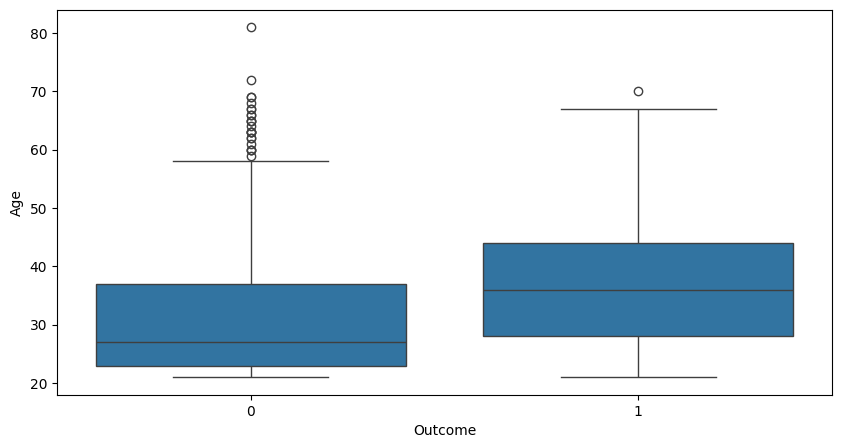

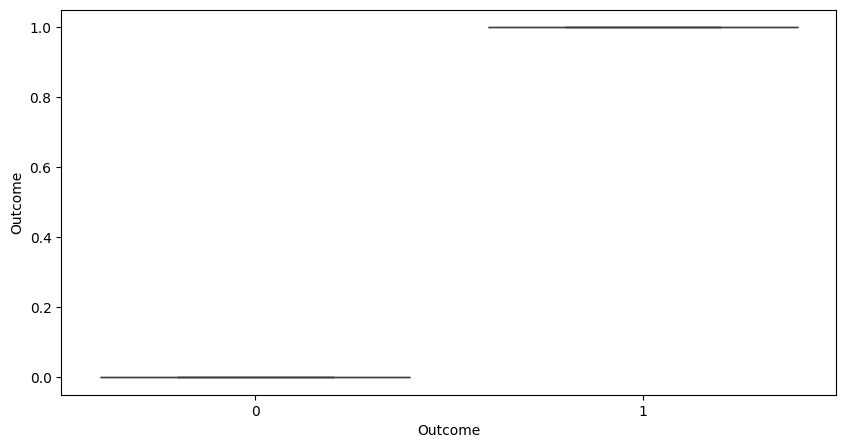

In [15]:
# boxplot des variables en fonction de notre variable cibles : outcome
for col  in data.columns:
   plt.figure(figsize=(10,5))
   sns.boxplot(x='Outcome' , y=col,data=data)
   plt.show()

## 4-MODELISATION D'UNE REGRESSION LOGISTIQUES

In [18]:
#gestion des valeurs abberantes car la regression logistiques
df=data.copy()

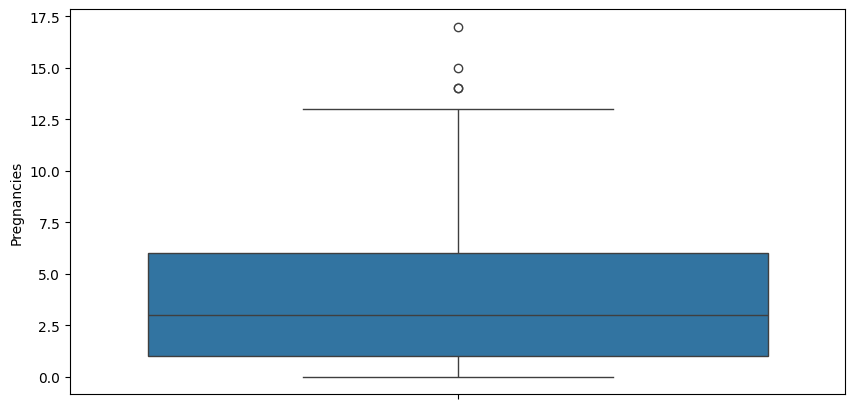

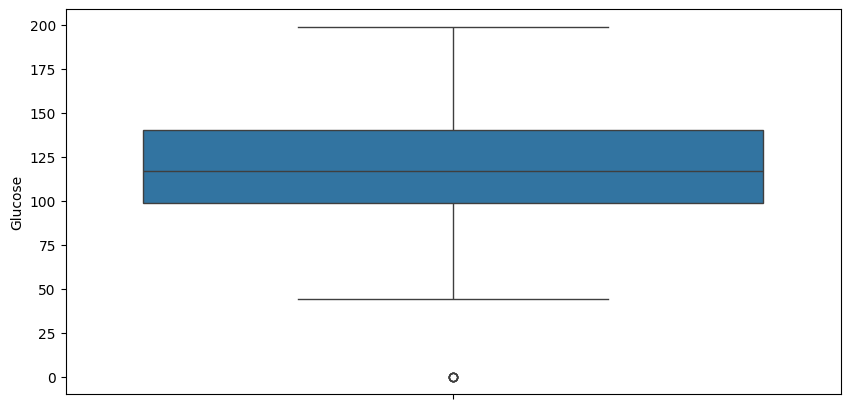

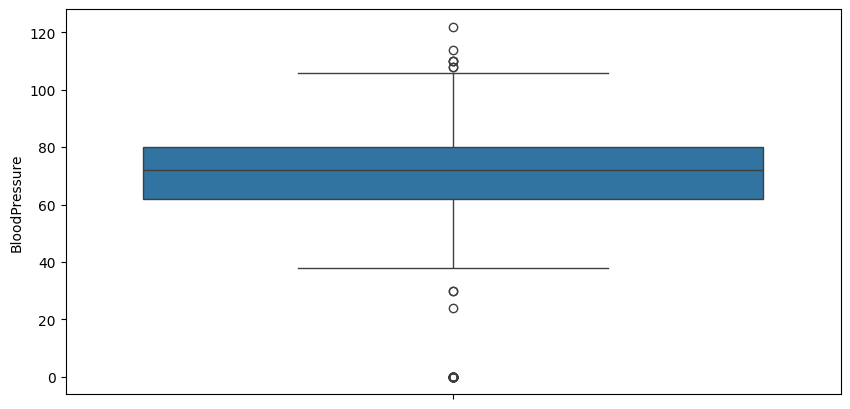

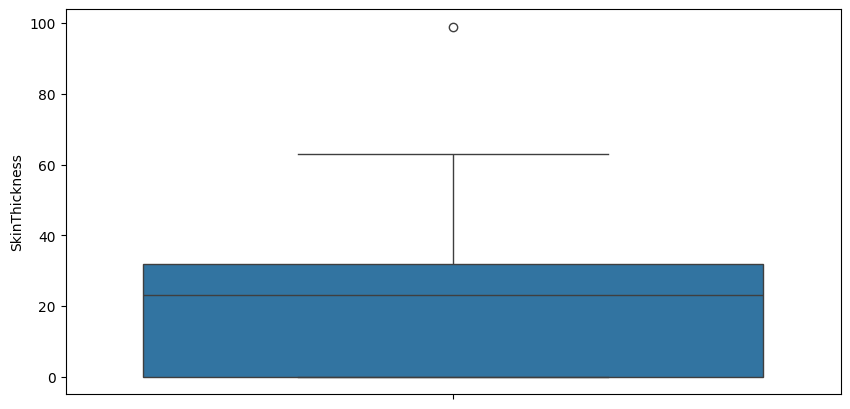

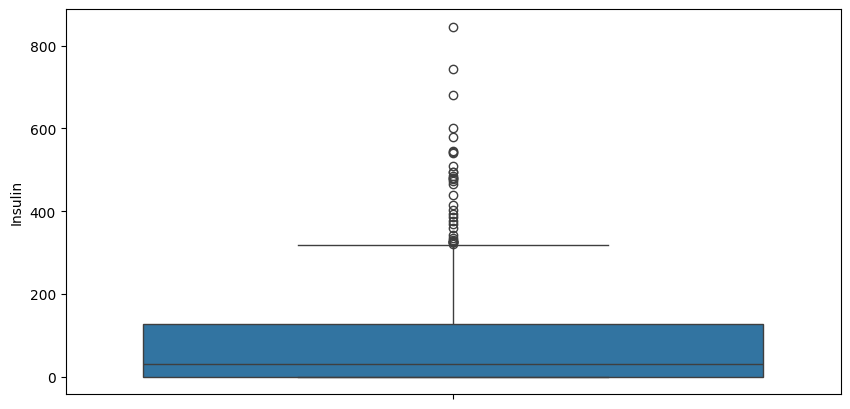

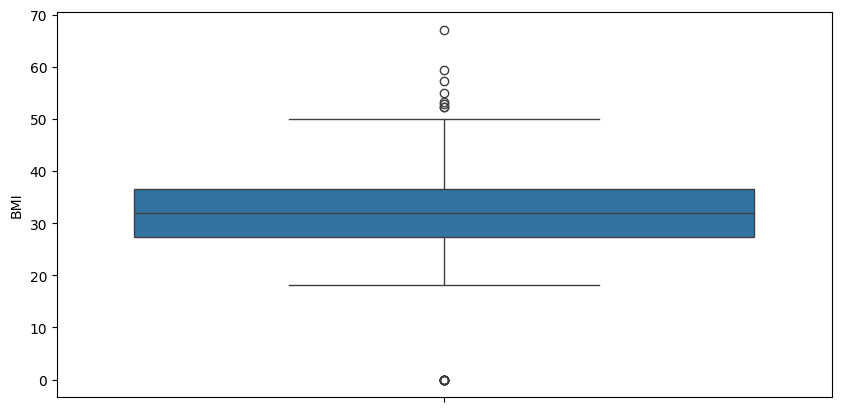

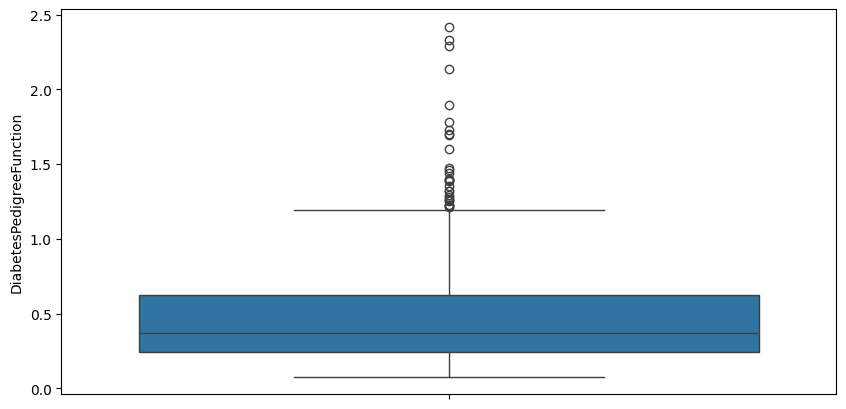

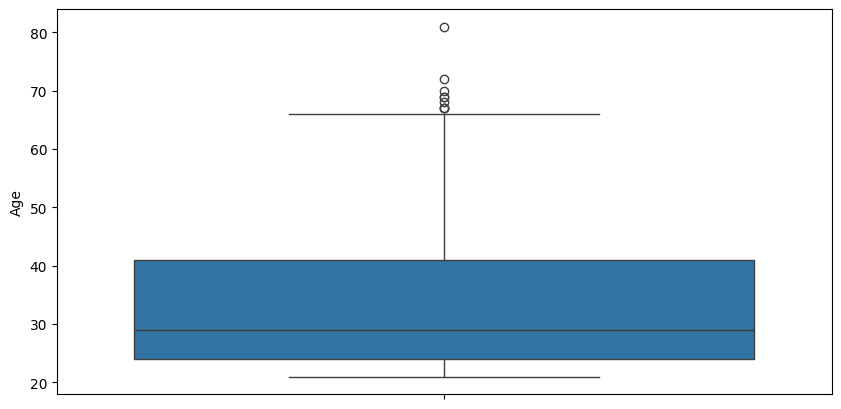

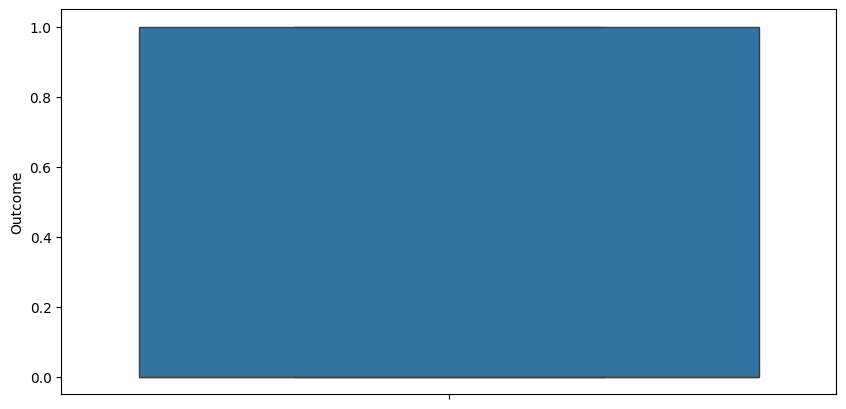

In [19]:
#visualisation des valeurs abberantes
for col in df.columns:
  plt.figure(figsize=(10,5))
  sns.boxplot(df[col])
  plt.show()

In [20]:
#correction des valeurs abberantes avec clip
df['Glucose']=df['Glucose'].clip(lower=df['Glucose'].quantile(0.05),upper=df['Glucose'].quantile(0.95))
df['BloodPressure']=df['BloodPressure'].clip(lower=df['BloodPressure'].quantile(0.05),upper=df['BloodPressure'].quantile(0.95))
df['SkinThickness']=df['SkinThickness'].clip(lower=df['SkinThickness'].quantile(0.05),upper=df['SkinThickness'].quantile(0.95))
df['Insulin']=df['Insulin'].clip(lower=df['Insulin'].quantile(0.05),upper=df['Insulin'].quantile(0.95))
df['BMI']=df['BMI'].clip(lower=df['BMI'].quantile(0.05),upper=df['BMI'].quantile(0.95))
df['DiabetesPedigreeFunction']=df['DiabetesPedigreeFunction'].clip(lower=df['DiabetesPedigreeFunction'].quantile(0.05),upper=df['DiabetesPedigreeFunction'].quantile(0.95))
df['Age']=df['Age'].clip(lower=df['Age'].quantile(0.05),upper=df['Age'].quantile(0.95))



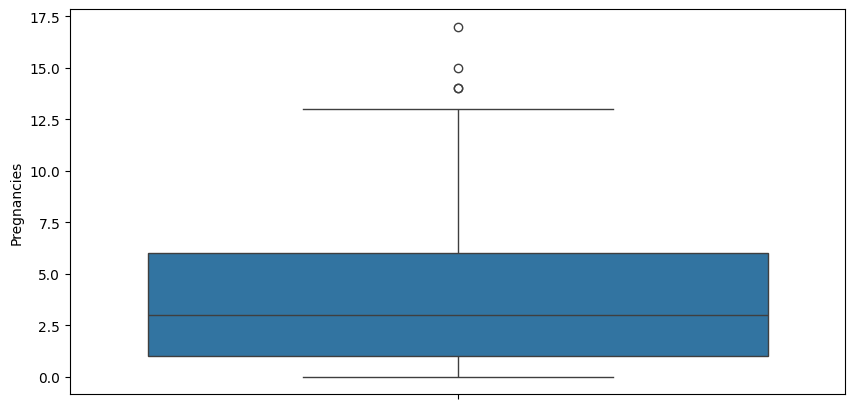

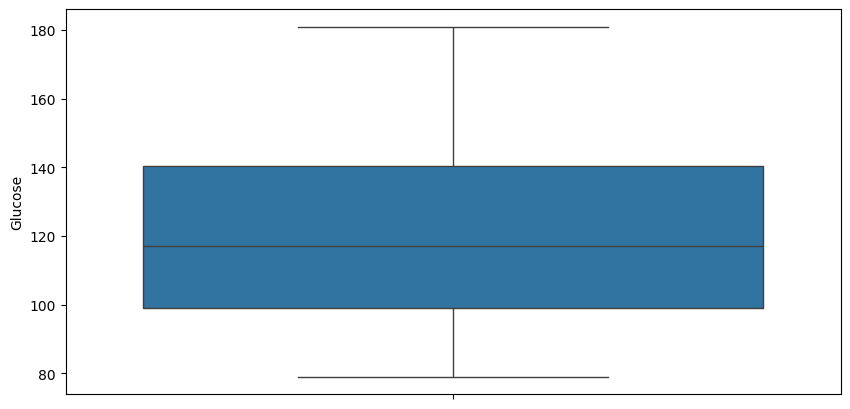

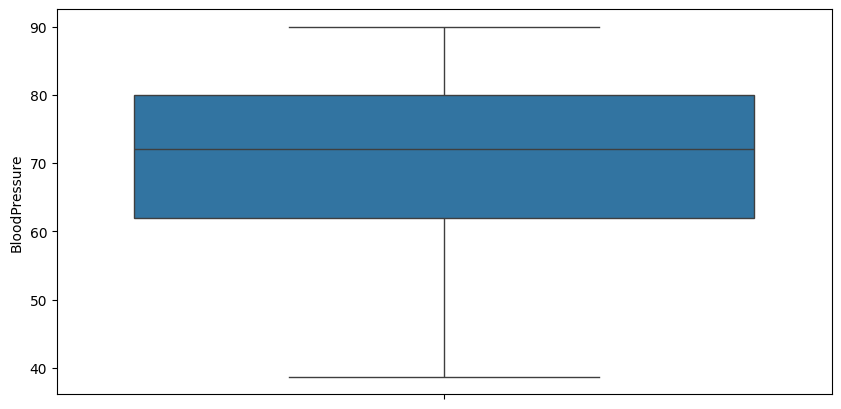

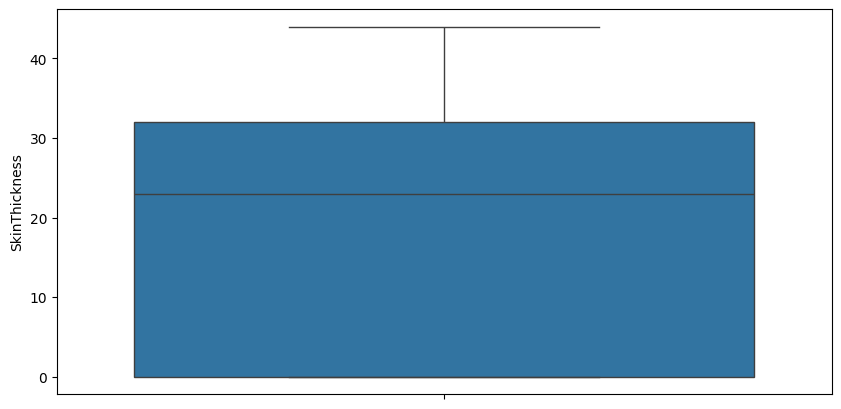

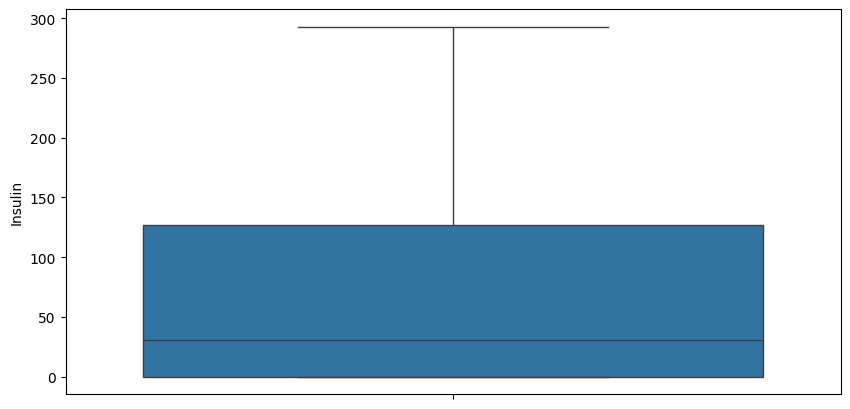

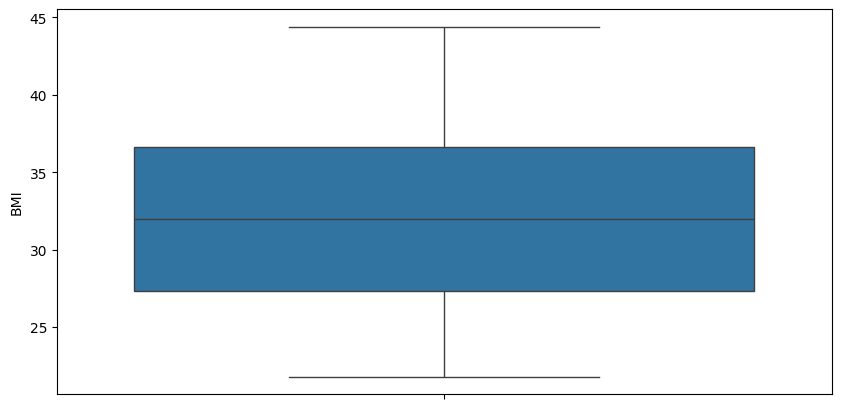

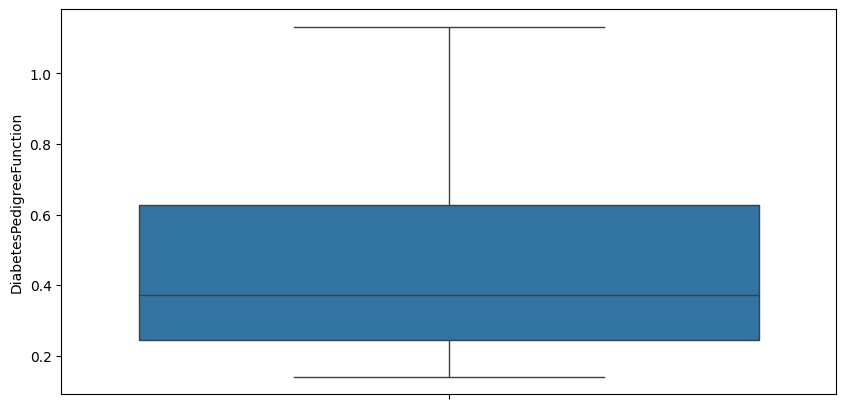

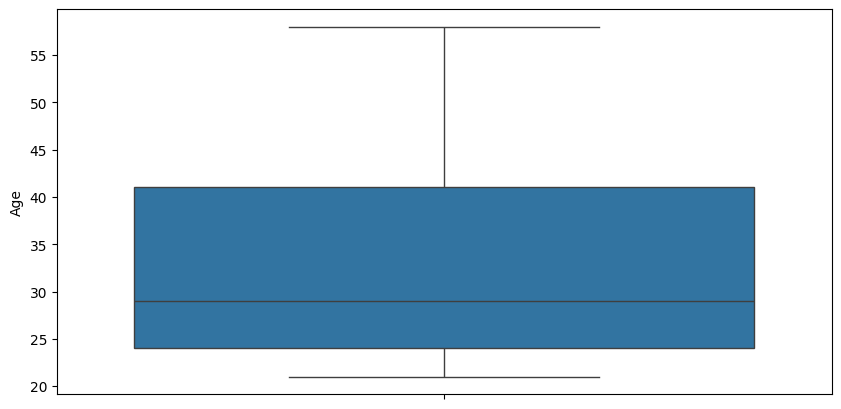

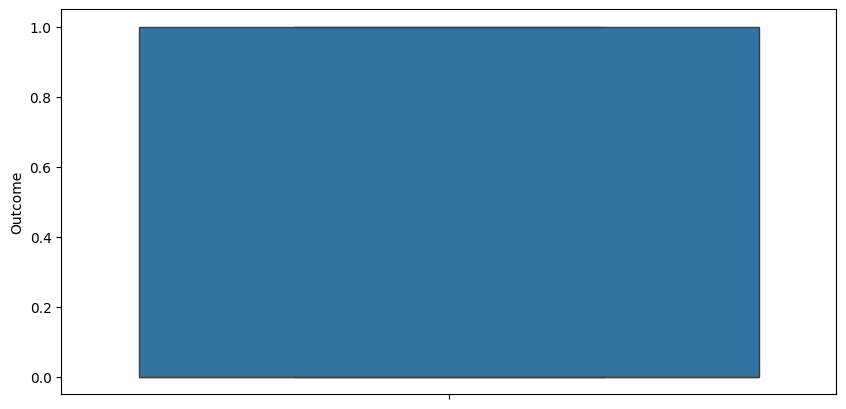

In [21]:
#verification
for col in df.columns:
  plt.figure(figsize=(10,5))
  sns.boxplot(df[col])
  plt.show()

Utiliser clip est une méthode simple et efficace pour gérer les valeurs aberrantes. Cela évite les valeurs extrêmes sans les supprimer entièrement, ce qui pourrait potentiellement entraîner une perte d'informations importantes. En limitant les valeurs à une plage spécifique, vous réduisez l'influence des valeurs aberrantes sur le modèle, tout en conservant la structure générale des données.






## Nouvelle section

In [22]:
#Nous allons diviser nos donnee en donnee de test et d'entrainement
X=df.drop('Outcome',axis=1)
y=df['Outcome']
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [23]:
#normalisation des donnee avec minmaxscaller pour remettre les donner entre 0 et 1
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
X_train=pd.DataFrame(scaler.fit_transform(X_train),columns=X_train.columns)
X_test= pd.DataFrame(scaler.transform(X_test),columns=X_test.columns)

In [40]:
#desequilibre des classe
smote = SMOTE(random_state=42)
X_train_res, y_train_res = smote.fit_resample(X_train, y_train)

Pregnancies  Glucose   BloodPressure  SkinThickness  Insulin   BMI       DiabetesPedigreeFunction  Age     
0.000000     0.000000  0.000000       0.000000       0.000000  0.000000  0.203174                  0.108108    1
0.294118     0.774510  0.883041       0.931818       0.716724  0.778933  0.256574                  0.216216    1
             0.500000  0.844055       0.000000       0.000000  0.765656  0.821814                  0.432432    1
             0.519608  0.805068       0.000000       0.000000  0.221288  0.045995                  1.000000    1
             0.558824  0.844055       0.000000       0.000000  0.000000  0.503426                  1.000000    1
                                                                                                              ..
0.117647     0.147059  0.571150       0.409091       0.259386  0.185882  0.423829                  0.000000    1
                       0.727096       0.409091       0.225256  0.433724  0.512494                  0.

In [37]:
#Entrainement du model
model=LogisticRegression()
model.fit(X_train_res,y_train_res)

LogisticRegression()

In [38]:
#nous allons creer une fonction pour faciliter l'evaluation du model avec les autres algo
def evaluation_model(model):
    y_train_pred = model.predict(X_train)

    y_test_pred = model.predict( X_test)

    #EVALUATION DE PERFORMANCE

    print("Performance sur les données d'entrainement\n")

    print("Accuracy : ",accuracy_score(y_train,y_train_pred))
    print("Recall : ",recall_score(y_train,y_train_pred))
    print("Precision : ",precision_score(y_train,y_train_pred))

    print("*"*50)

    print("Performance sur les données de test\n")

    print("Accuracy : ",accuracy_score(y_test,y_test_pred))
    print("Recall : ",recall_score(y_test,y_test_pred))
    print("Precision : ",precision_score(y_test,y_test_pred))

    # matrice de confusion
    cm=confusion_matrix(y_test,y_test_pred)
    cm_disp =ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
    cm_disp.plot()
    plt.show()

Performance sur les données d'entrainement

Accuracy :  0.7687296416938111
Recall :  0.7511737089201878
Precision :  0.642570281124498
**************************************************
Performance sur les données de test

Accuracy :  0.6753246753246753
Recall :  0.7090909090909091
Precision :  0.5342465753424658


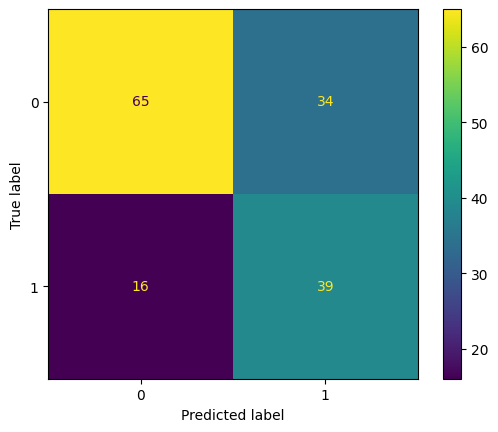

In [39]:
evaluation_model(model)

## OPTIMISATION DU MODEL DE REGRESSION LOGISTIQUE

In [50]:
# Grille des hyperparamètres à tester
param_grid = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100],  # Inverse de la force de régularisation
    'penalty': ['l1', 'l2'],  # Type de régularisation : Lasso (l1) ou Ridge (l2)
    'solver': ['liblinear']  # Solver adapté à la régularisation L1 (Lasso)
}

# Utilisation de GridSearchCV pour trouver les meilleurs hyperparamètres
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, scoring='roc_auc', verbose=1)
grid_search.fit(X_train_res, y_train_res)

# Affichage des meilleurs paramètres trouvés
print("Meilleurs paramètres trouvés:")
print(grid_search.best_params_)
print()

# Ré-entraînement du modèle avec les meilleurs hyperparamètres sur l'ensemble d'entraînement complet
best_model = grid_search.best_estimator_
best_model.fit(X_train_res, y_train_res)

# Évaluation du modèle ré-entraîné sur les données de test
y_pred_proba = best_model.predict_proba(X_test)[:, 1]
y_pred = best_model.predict(X_test)

# Affichage des résultats d'évaluation
print("Classification Report sur les données de test:")
print(classification_report(y_test, y_pred))

print("ROC AUC Score sur les données de test:")
roc_auc = roc_auc_score(y_test, y_pred_proba)
print(roc_auc)


Fitting 5 folds for each of 12 candidates, totalling 60 fits
Meilleurs paramètres trouvés:
{'C': 1, 'penalty': 'l2', 'solver': 'liblinear'}

Classification Report sur les données de test:
              precision    recall  f1-score   support

           0       0.80      0.67      0.73        99
           1       0.54      0.69      0.60        55

    accuracy                           0.68       154
   macro avg       0.67      0.68      0.66       154
weighted avg       0.70      0.68      0.68       154

ROC AUC Score sur les données de test:
0.8102846648301194


NOTRE MODEL a un AUC  de 0.81 ec qui veut dire que notre moedel est capable de predire a 81 % sur les donner de test c'est une tres bonne chose

MODELISATION D'UN RANDOM FOREST(FORET ALEATOIRE)

In [52]:
#Nous allons diviser nos donnee en donnee de test et d'entrainement pour Random forest
X=data.drop('Outcome',axis=1)
y=data['Outcome']
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [53]:
#normalisation des donnee avec minmaxscaller pour remettre les donner entre 0 et 1
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
X_train=pd.DataFrame(scaler.fit_transform(X_train),columns=X_train.columns)
X_test= pd.DataFrame(scaler.transform(X_test),columns=X_test.columns)

In [56]:
#desequilibre des classe
smote = SMOTE(random_state=42)
X_train_res, y_train_res = smote.fit_resample(X_train, y_train)

In [57]:
# entrainement du model

rf = RandomForestClassifier()

model_rf = rf.fit(X_train_res,y_train_res)

Performance sur les données d'entrainement

Accuracy :  1.0
Recall :  1.0
Precision :  1.0
**************************************************
Performance sur les données de test

Accuracy :  0.7402597402597403
Recall :  0.7636363636363637
Precision :  0.6086956521739131


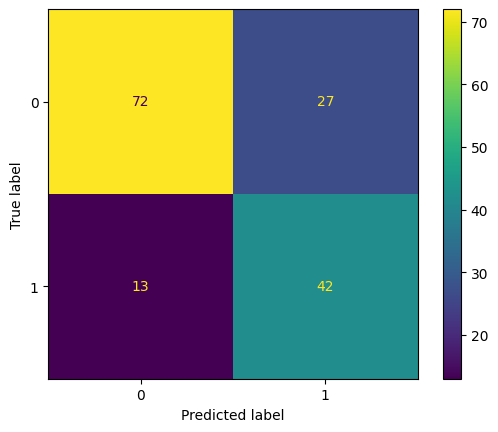

In [58]:
evaluation_model(model_rf)

OPTIISATION DU MODEL DE RANDOM FOREST


In [59]:
# Recherche des hyper-parametres pour l'optimisation du model avec GridSearchCV

hyperparameters = {
    'n_estimators': [5, 10, 20, 30],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]}

grid_search_rf = GridSearchCV(model_rf, hyperparameters, cv=5)
grid_search_rf.fit(X_train_res, y_train_res)

print("Meilleur score:", grid_search_rf.best_score_)
print("Meilleur hyperparamètres:", grid_search_rf.best_params_)

Meilleur score: 0.834277950310559
Meilleur hyperparamètres: {'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 20}


Performance sur les données d'entrainement

Accuracy :  0.9788273615635179
Recall :  0.9906103286384976
Precision :  0.9504504504504504
**************************************************
Performance sur les données de test

Accuracy :  0.7077922077922078
Recall :  0.7272727272727273
Precision :  0.5714285714285714


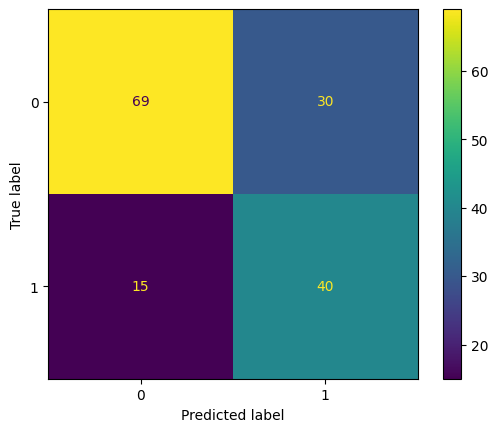

In [60]:
# evaluation du model avec les meilleur hyperparametre
evaluation_model(grid_search_rf.best_estimator_)

In [61]:
# Prédiction des probabilités sur les données de test
y_pred_proba = grid_search_rf.best_estimator_.predict_proba(X_test)[:, 1]

# Calcul de l'AUC
auc_score = roc_auc_score(y_test, y_pred_proba)

# Affichage du résultat
print(f"AUC Score pour le modèle de Random Forest : {auc_score}")

AUC Score pour le modèle de Random Forest : 0.813682277318641


## Notre model de random forest a un AUC  DE 0.813 tans dis que notre model de regression logistique a un AUC de 0,810 donc je peux dire que random forest est le meilleur alogrithme pouur aller en deploiement

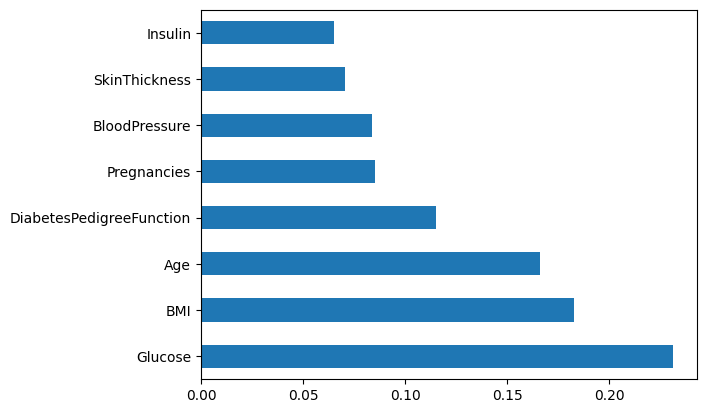

In [62]:
# Visualisation des variables les plus imortantes du model RandomForest

feature_importances = pd.Series(model_rf.feature_importances_, index=X.columns)
feature_importances.nlargest(10).plot(kind='barh')
plt.show()

cette figure nous montre l'importance des differentes variables

In [66]:
feature_importances.index.to_list()


['Pregnancies',
 'Glucose',
 'BloodPressure',
 'SkinThickness',
 'Insulin',
 'BMI',
 'DiabetesPedigreeFunction',
 'Age']

In [67]:
model_rf_end =grid_search_rf.best_estimator_

In [69]:
# Enregistrement du model RandomForest
import pickle as pkl

with open("model_rf_end.pkl", 'wb') as file:
    pkl.dump(model_rf_end, file)
